In [1]:
import pandas as pd
import glob 
import matplotlib.pyplot as plt
import numpy as np
  
raw_data_path = 'C:/Users/241242/PycharmProjects/pabd25_AZ/data/raw'
file_list = glob.glob(raw_data_path + "/*.csv") 

In [4]:
file_list

['C:/Users/241242/PycharmProjects/pabd25_AZ/data/raw\\1_2025-06-02_21-22.csv']

In [5]:
main_dataframe = pd.read_csv(file_list[0])
for i in range(1, len(file_list)): 
    data = pd.read_csv(file_list[i]) 
    df = pd.DataFrame(data) 
    main_dataframe = pd.concat([main_dataframe, df], axis=0) 

In [6]:
main_dataframe


,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price_per_month,commissions,price,district,street,house_number,underground,residential_complex
0,White and Broughton,real_estate_agent,https://www.cian.ru/sale/flat/313640113/,Москва,sale,flat,6,41,1,40.1,-1,0,35500000,Хорошевский,Ленинградский проспект,37/5,Аэропорт,Прайм Парк
1,White and Broughton,real_estate_agent,https://www.cian.ru/sale/flat/309525051/,Москва,sale,flat,2,40,1,40.2,-1,0,32500000,Хорошевский,Ленинградский проспект,37/4,ЦСКА,Прайм Парк
2,Jcat,real_estate_agent,https://www.cian.ru/sale/flat/318010456/,Москва,sale,flat,6,8,1,40.6,-1,0,17000000,Хамовники,Усачева,19АК1,Спортивная,NaN
3,СМАРЕНТ,real_estate_agent,https://www.cian.ru/sale/flat/313138677/,Москва,sale,flat,7,32,1,36.0,-1,0,11350000,Митино,Муравская,38Бк4,Пятницкое шоссе,Митинский лес
4,PROНЕДВИЖИМОСТЬ,real_estate_agent,https://www.cian.ru/sale/flat/318165939/,Москва,sale,flat,2,17,1,41.9,-1,0,9200000,Косино-Ухтомский,Лухмановская,15к4,Лухмановская,NaN
5,Парадайс,real_estate_agent,https://www.cian.ru/sale/flat/318049115/,Москва,sale,flat,8,14,1,39.1,-1,0,9290000,Марьино,Новочеркасский бульвар,25,Марьино,NaN
6,ID 125599952,homeowner,https://www.cian.ru/sale/flat/317390151/,Москва,sale,flat,3,30,1,44.6,-1,0,16800000,Богородское,бульвар Маршала Рокоссовского,6к1,Бульвар Рокоссовского,Богородский
7,Kalinka Group,real_estate_agent,https://www.cian.ru/sale/flat/317021340/,Москва,sale,flat,11,41,1,48.0,-1,0,44900000,Раменки,1-й Сетуньский проезд,8,Кутузовская,Hide
8,Елизавета Трушина,realtor,https://www.cian.ru/sale/flat/316595702/,Москва,sale,flat,8,12,1,35.0,-1,0,8200000,Гольяново,Черницынский проезд,12,Щёлковская,NaN
9,Villagio Realty,real_estate_agent,https://www.cian.ru/sale/flat/316324230/,Москва,sale,flat,2,8,1,60.0,-1,0,75000000,Таганский,Тессинский переулок,1,Чкаловская,"Тессинский, 1"


In [7]:
main_dataframe['url_id'] = main_dataframe['url'].map(lambda x: x.split('/')[-2])
new_dataframe = main_dataframe[['url_id', 'total_meters', 'price']].set_index('url_id')

<Axes: >

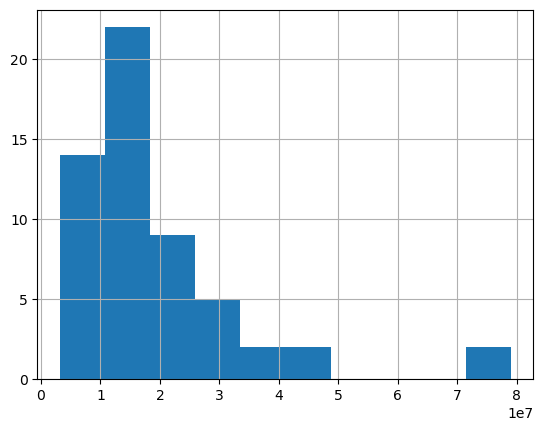

In [8]:
new_dataframe['price'].hist()

In [9]:
new_df = new_dataframe[new_dataframe['price'] < 100_000_000]
new_df = new_df[new_df['total_meters'] < 100]

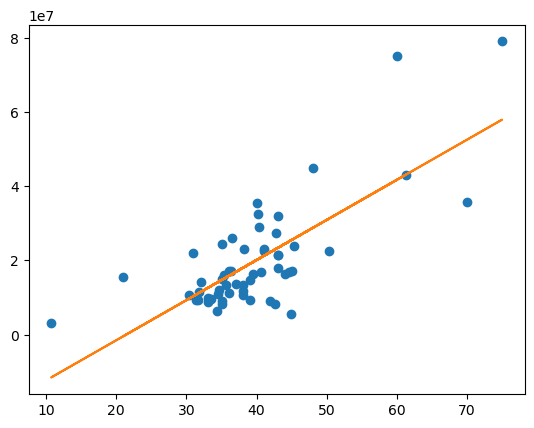

In [10]:
x = new_df['total_meters']
y = new_df['price']

plt.plot(x, y, 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

#add linear regression line to scatterplot 
plt.plot(x, m*x+b)

In [11]:
new_df.to_csv('C:/Users/241242/PycharmProjects/pabd25_AZ/data/processed/train.csv', index=False)